In [2]:
import supermarq
import qiskit
import qiskit_superstaq as qss
import os

In [3]:
hm = supermarq.hamiltonian_simulation.HamiltonianSimulation(num_qubits=10)
hm_circuit = hm.circuit()

In [4]:
# Provide your api key to the Provider using the "api_key" argument if
# SUPERSTAQ_API_KEY environment variable is not set.
api_key = "1446224e1fed6a2d1408bf1e90180891c56dd33698d1d23e54f25044487108c2"
# Submit qiskit circuits via qiskit-superstaq
provider = qss.SuperstaqProvider(api_key)
print(provider.get_balance())

17.25 credits


In [5]:
backend = provider.get_backend("ss_unconstrained_simulator")
job_qss = backend.run(
    supermarq.converters.cirq_to_qiskit(hm_circuit), shots=1000, method="dry-run"
)

In [8]:
job_qss.status()

counts = job_qss.result().get_counts()
print(counts)
score_qss = hm.score(counts)
print(score_qss)


{'1110111000': 1, '1111111000': 3, '1011000100': 1, '1111000100': 1, '0111100100': 1, '1010110100': 1, '1101110100': 1, '1111110100': 1, '1111011100': 1, '1010111100': 2, '1110111100': 1, '1101111100': 2, '0111111100': 1, '1111111100': 7, '1111110010': 1, '1100101010': 1, '1101101010': 1, '1011101010': 1, '1111011010': 1, '1110111010': 2, '1001111010': 2, '0101111010': 1, '1101111010': 1, '0111111010': 2, '1111111010': 8, '1111000110': 1, '1110100110': 1, '1101100110': 1, '1111010110': 2, '1010110110': 1, '1110110110': 1, '1101110110': 2, '0111110110': 2, '1111110110': 8, '1111001110': 1, '1101101110': 1, '1011101110': 2, '1111101110': 2, '0110011110': 1, '1110011110': 1, '1101011110': 2, '0111011110': 2, '1111011110': 7, '1110111110': 6, '0001111110': 1, '1001111110': 1, '1101111110': 7, '0011111110': 1, '1011111110': 6, '0111111110': 8, '1111111110': 42, '1111010001': 1, '1111110001': 1, '0101101001': 1, '0110011001': 1, '1111011001': 1, '1010111001': 1, '1110111001': 2, '0011111001'

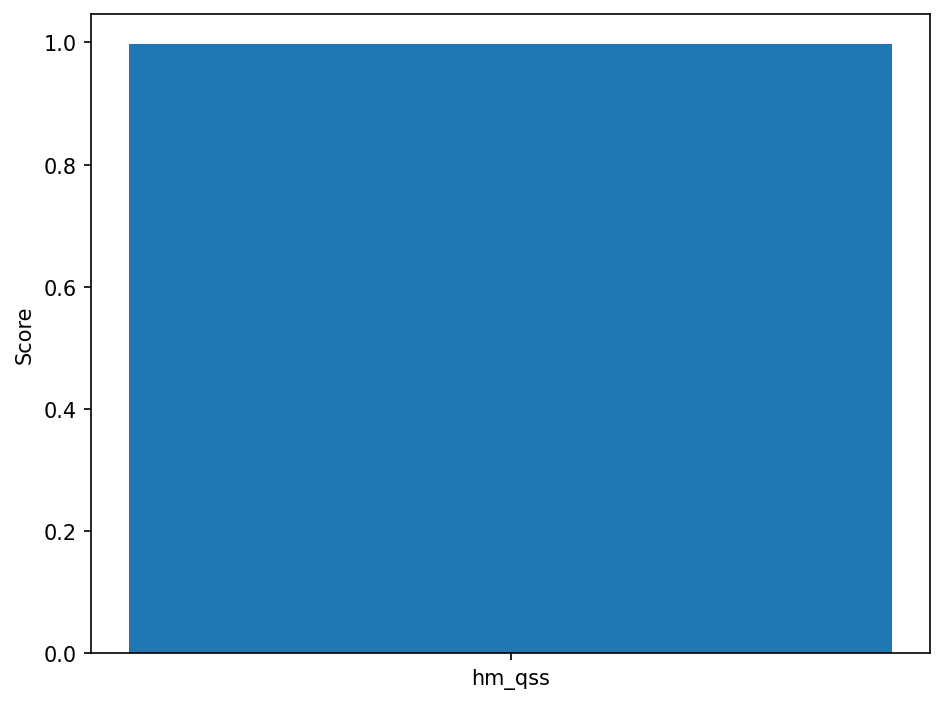

In [9]:
supermarq.plotting.plot_results([score_qss], ["hm_qss"])